In [2]:
import torch
import librosa
import numpy as np
import matplotlib.pyplot as plt

from parallel_wavegan.utils import load_model

from IPython.display import Audio
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
vocoder = load_model("/TransformerTTS/vocoder/checkpoint-2500000steps.pkl").to('cuda').eval()
vocoder.remove_weight_norm()
_ = vocoder.eval()

In [ ]:
y, sr = librosa.load("/TransformerTTS/data/wavs/LJ001-0001.wav")
S = np.abs(librosa.stft(y, n_fft=1024, hop_length=256))

mel_filter = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=80, fmin=80, fmax=7600)
mel = np.dot(mel_filter, S)

log_mel = np.log(np.clip(mel, None, None))
mu, sigma = np.mean(log_mel), np.std(log_mel)

normalized_log_mel = (log_mel - mu) / sigma

x = torch.FloatTensor(normalized_log_mel.T).cuda()
out = vocoder.inference(x).view(-1).detach().cpu().numpy()

Audio(out, rate=sr)

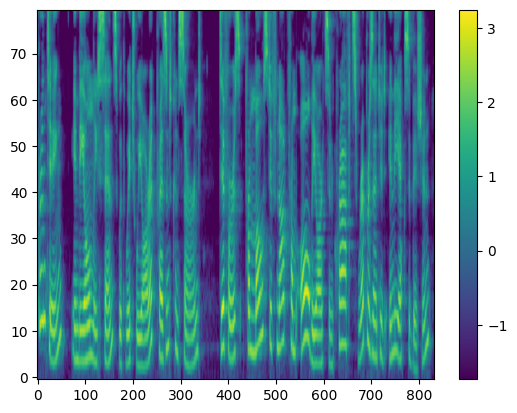

In [ ]:
plt.imshow(x, aspect='auto', origin='lower')
plt.colorbar()
plt.show()